# Chapter 9 Exercises

1. _How would you define clustering? Can you name a few clustering algorithms?_<br>
<br>
Clustering is a technique for grouping similar instances in a dataset.<br>
Some example algorithms are K-Means, DBSCAN, and agglomerative clustering<br>
<br>
1. _What are some of the main applications of clustering algorithms?_<br>
<br>
To explore patterns in the dataset, find relationships, specifically: anomaly detection, dimensionality reduction or feature engineering (with affinity vectors), semi-suspervised learning.<br><br>
1. _Describe two techniques to select the right number of clusters when using K-Means._<br>
<br>
You can look for the elbow in the inertia vs. cluster graph, which will give a rough idea. A better technique is to try and maximize the silhouette score. The best technique is to analyze silhouette diagrams and choose the cluster number that gives even clusters compared with the silhouette score.
<br><br>
1. _What is label propagation? Why would you implement it, and how?_<br>
<br>
A technique for generating labels when your coverage of the dataset is sparse, and you'd like to perform supervised learning, for example.<br>
You can cluster the dataset, using K-Means for example, and copy the most common label in a cluster to each unlabeled instance.<br><br>
1. _Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?_<br>
<br>
large datasets: BIRCH, agglomerative clustering <br>
high density: DBSCAN, Mean-Shift<br><br>
1. _Can you think of a use case where active learning would be useful? How would you implement it?_<br>
<br>
Identification of objects in images from self-driving car cameras.<br>
Force the public to label the images to prove that they are humans on websites.
<br><br>
1. _What is the difference between anomaly detection and novelty detection?_<br>
<br>
Novelty detection assumes no outliers in the training set, while anomaly detection does not.
<br><br>
1. _What is a Gaussian mixture? What tasks can you use it for?_<br>
<br>
A probabalistic model that assumes instances were generated from several Gaussian distributions<br>
Anomaly detection, generating new instances.
<br><br>
1. _Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?_<br>
<br>
Find the number of clusters that minimizes the Bayesian information criterion (BIC) or the Akaike information criterion.<br>
Alternatively, fit a BayesianGaussianMixture with the n_components set to slightly more clusters than you believe exist, and it will eliminate the unnecessary ones.
<br><br>
1. _The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?_

In [142]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

data_bunch = fetch_olivetti_faces()
X = data_bunch['data']
y = data_bunch['target']
images = data_bunch['images']

sss = StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=.15)
for train_index, test_index in sss.split(X, y):
    X_train_val, X_test = X[train_index], X[test_index]
    y_train_val, y_test = y[train_index], y[test_index]
    images_train_val, images_test = images[train_index], images[test_index]
    
for train_index, test_index in sss.split(X_train_val, y_train_val):
    X_train, X_val = X_train_val[train_index], X_train_val[test_index]
    y_train, y_val = y_train_val[train_index], y_train_val[test_index]
    images_train, images_val = images[train_index], images[test_index]    

In [144]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = []
sscores = []
inertias = []
# original answer: group_range = range(2, 41)
# solutions answer, although this also requires PCA to get good clusters
group_range = range(5, 150, 5) 
for i in group_range:
    km = KMeans(n_clusters=i, random_state=0).fit(X_train)
    kmeans.append(km)
    s = silhouette_score(X_train, km.labels_)
    sscores.append(s)
    inertias.append(km.inertia_)
    print(str(i) + '\t' + str(s) + '\t' + str(km.inertia_))

5	0.10523325	15542.6787109375
10	0.08935752	13613.1328125
15	0.10027179	12330.2470703125
20	0.10377191	11243.8974609375
25	0.10756607	10456.353515625
30	0.13115476	9576.9521484375
35	0.13951124	8873.521484375
40	0.1513849	8236.2177734375
45	0.14818579	7794.51904296875
50	0.16877851	7234.0478515625
55	0.17808954	6742.0322265625
60	0.17711681	6403.251953125
65	0.18799944	5998.90771484375
70	0.19513679	5672.3095703125
75	0.19568962	5369.240234375
80	0.19567229	5084.1982421875
85	0.20406355	4703.4296875
90	0.2004274	4504.30029296875
95	0.20033407	4252.8798828125
100	0.19190462	4037.353515625
105	0.20367186	3815.125732421875
110	0.20301887	3588.951171875
115	0.20856665	3351.103515625
120	0.20333019	3171.41650390625
125	0.19698653	2985.17724609375
130	0.20154819	2816.3212890625
135	0.19382717	2636.64892578125
140	0.19862384	2497.26025390625
145	0.1923948	2338.236328125


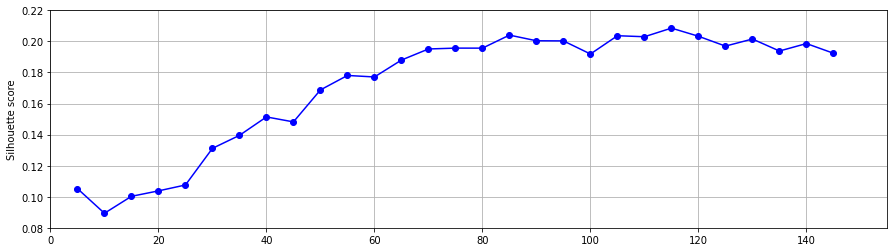

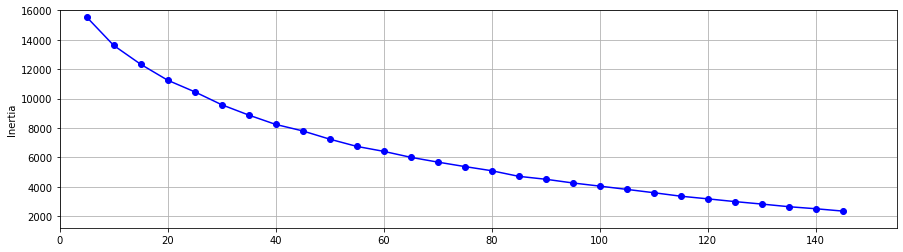

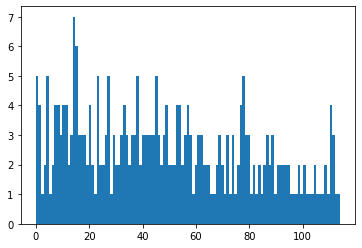

In [154]:
import matplotlib.pyplot as plt

group_range = range(5, 150, 5)

plt.figure(figsize=(15, 4))
plt.plot(group_range, sscores, "bo-")
plt.ylabel("Silhouette score")
plt.axis([0, 155, 0.08, 0.22])
plt.grid()
plt.show()

plt.figure(figsize=(15, 4))
plt.plot(group_range, inertias, "bo-")
plt.ylabel("Inertia")
plt.axis([0, 155, 1200, 16000])
plt.grid()
plt.show()

# best score at 115
km = kmeans[115//5 - 1]
n_groups = km.cluster_centers_.shape[0]

plt.hist(km.labels_, bins=n_groups)
plt.show()

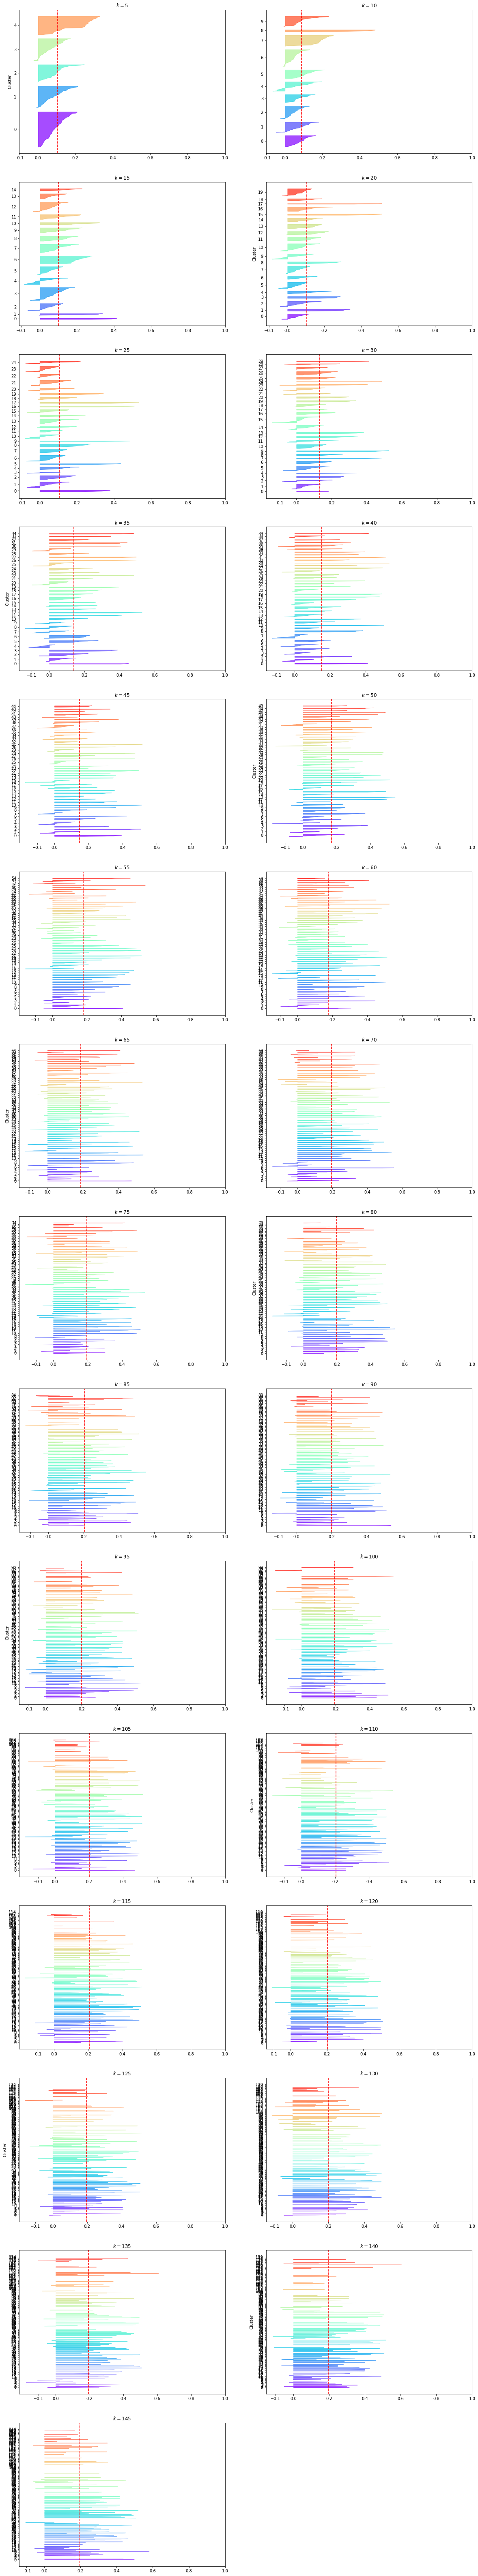

In [155]:
import numpy as np
import math
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

def plot_silhouette_diagrams(group_range, X, kmeans_per_k, silhouette_scores):
    '''
     adapted from https://github.com/ageron/handson-ml3/blob/main/09_unsupervised_learning.ipynb
    '''

    plt.figure(figsize=(20, 8 * len(group_range)/2))
    for j, k in enumerate(group_range):
        #if (j % 3) == 0:
        #plt.subplot(1, 3, (j % 3)+1)
        plt.subplot(math.ceil(len(group_range)/2), 2, j +1)

        y_pred = kmeans_per_k[j].labels_
        silhouette_coefficients = silhouette_samples(X, y_pred)

        padding = len(X) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = plt.cm.rainbow(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if j % 3 == 0:
            plt.ylabel("Cluster")

  #      if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        #plt.xlabel("Silhouette Coefficient")
#        else:
 #           plt.tick_params(labelbottom=False)

        plt.axvline(x=silhouette_scores[j], color="red", linestyle="--")
        plt.title(f"$k={k}$")

   # save_fig("silhouette_analysis_plot")
    #plt.subplots_adjust(wspace=0, hspace=0)
    #    if (j % 3) == 0:
    plt.show()
    
plot_silhouette_diagrams(group_range, X_train, kmeans, sscores)

0


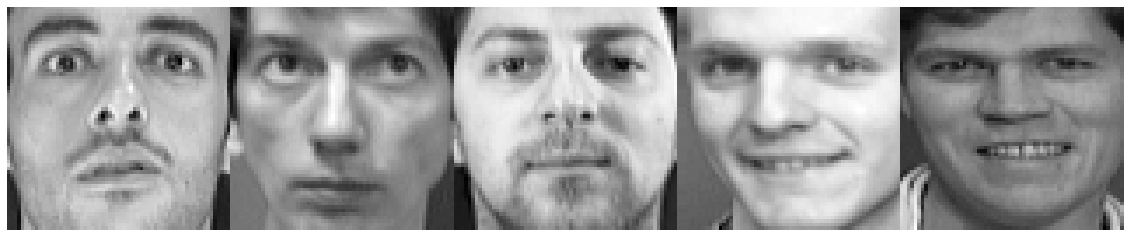

1


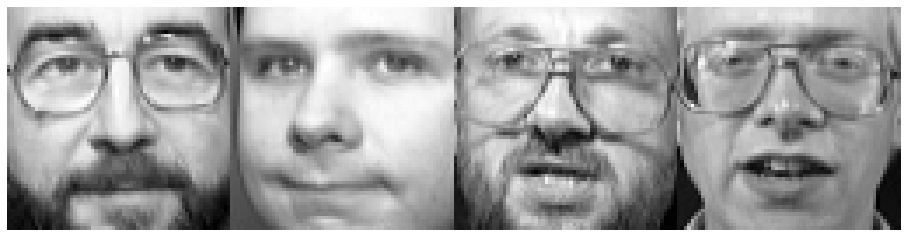

2


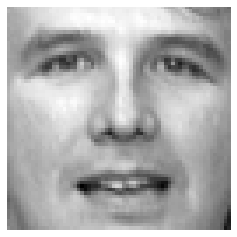

3


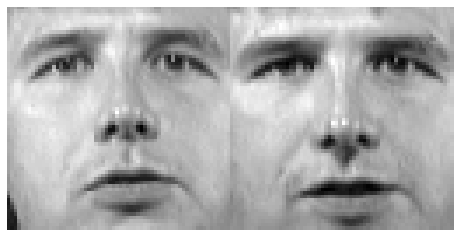

4


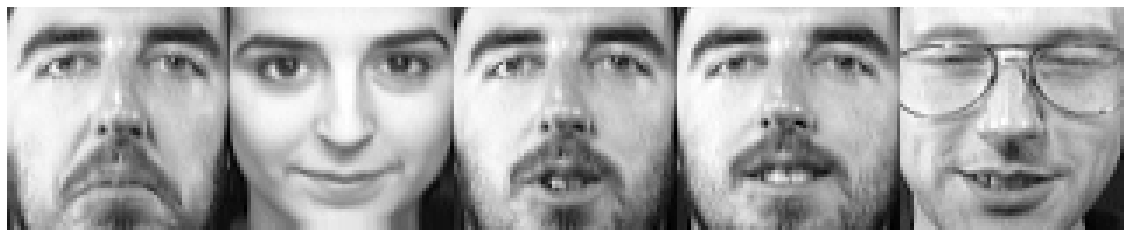

5


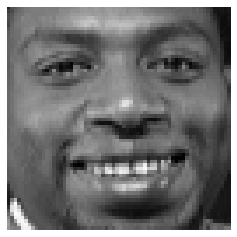

6


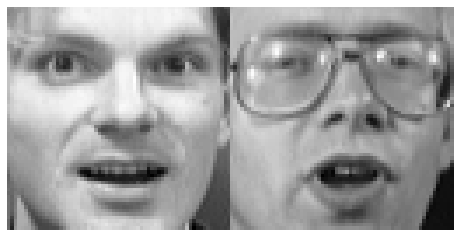

7


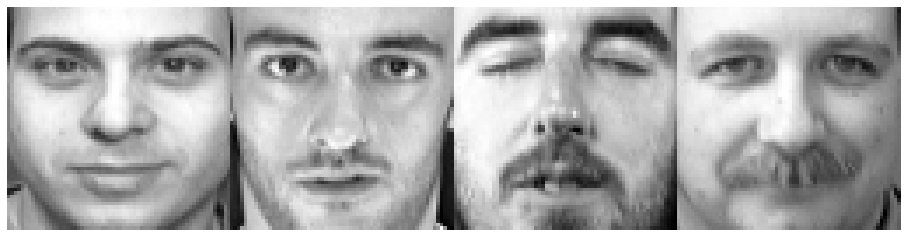

8


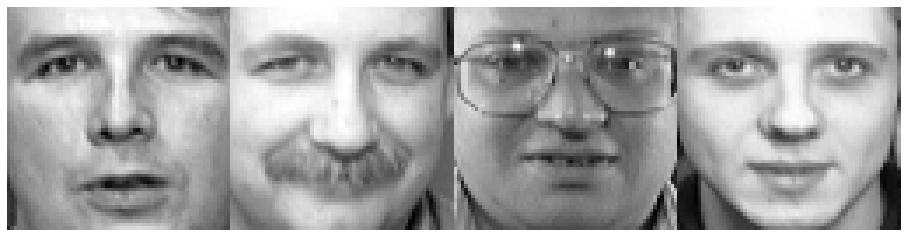

9


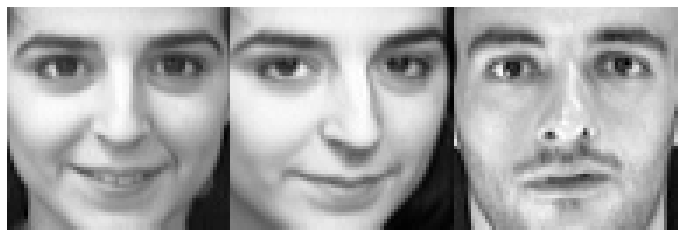

10


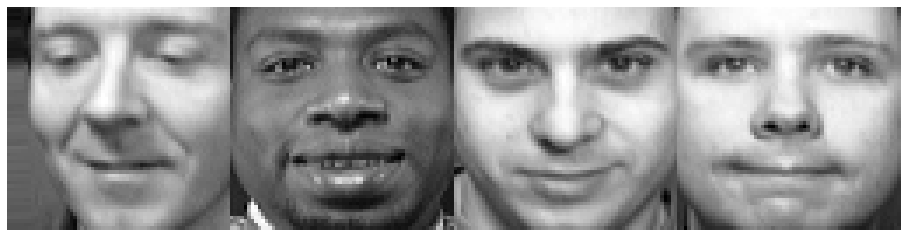

11


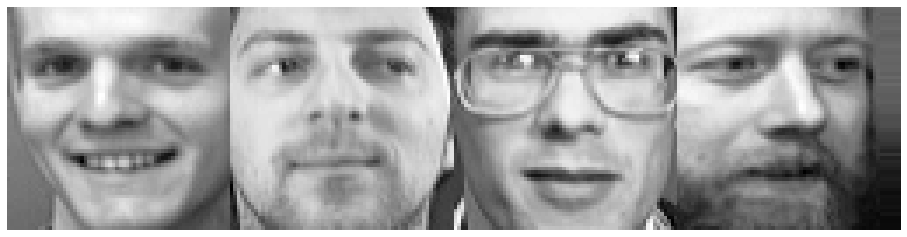

12


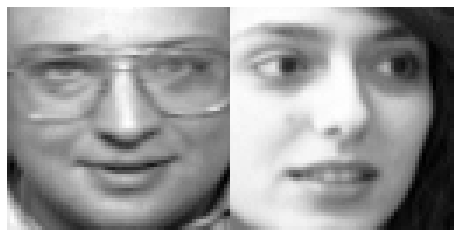

13


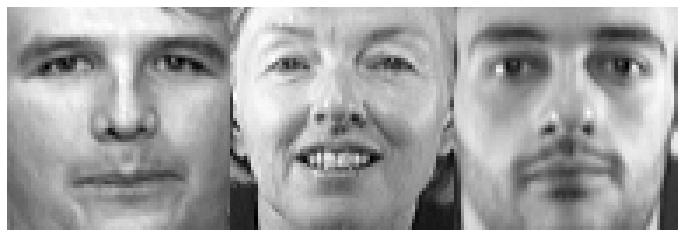

14


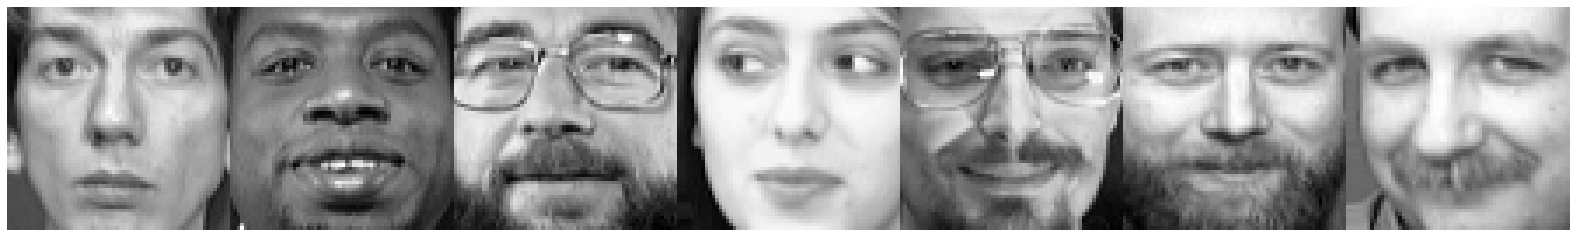

15


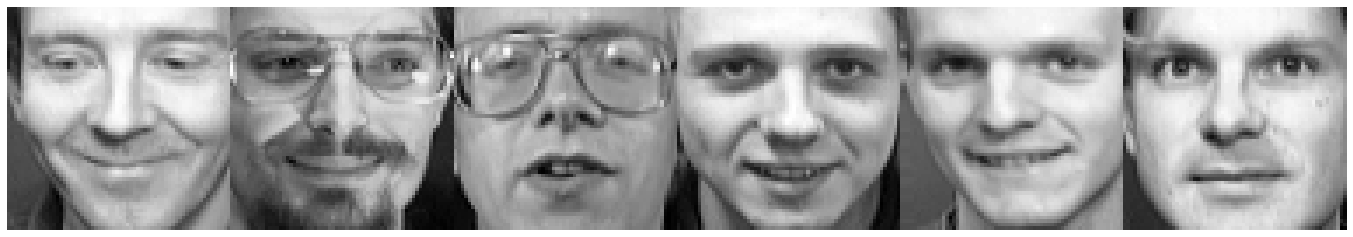

16


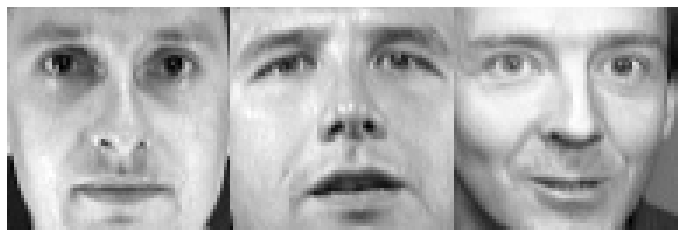

17


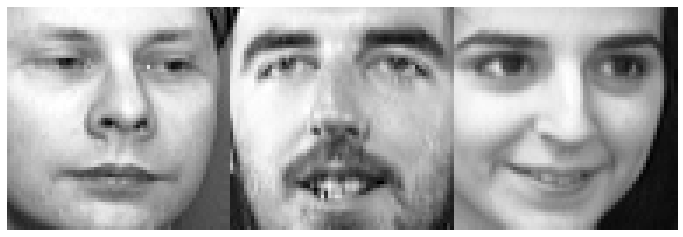

18


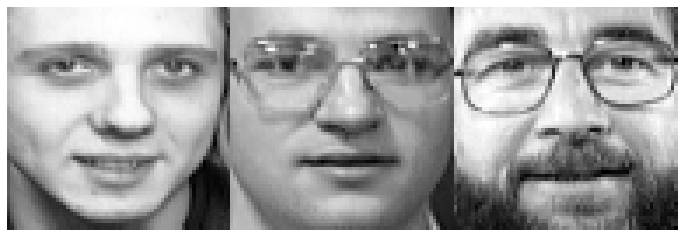

19


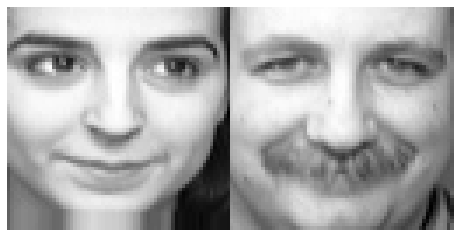

20


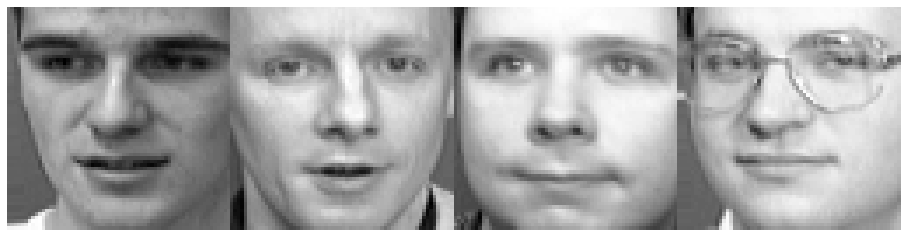

21


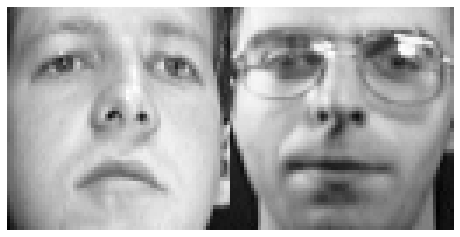

22


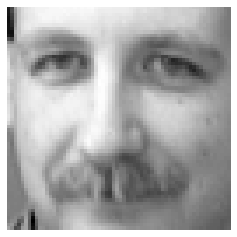

23


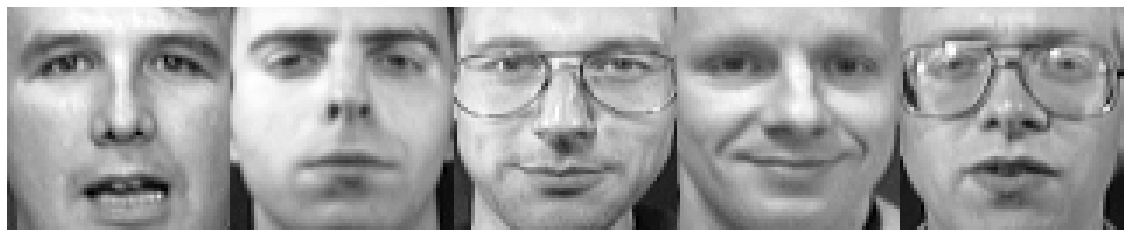

24


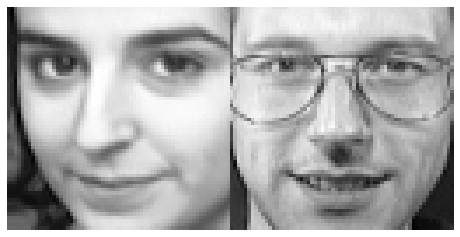

25


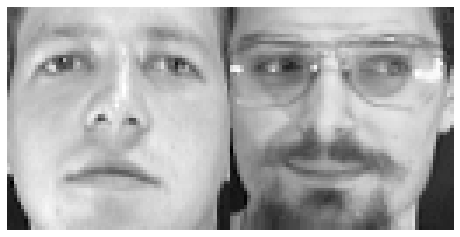

26


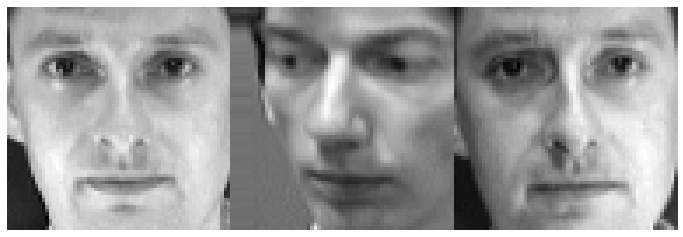

27


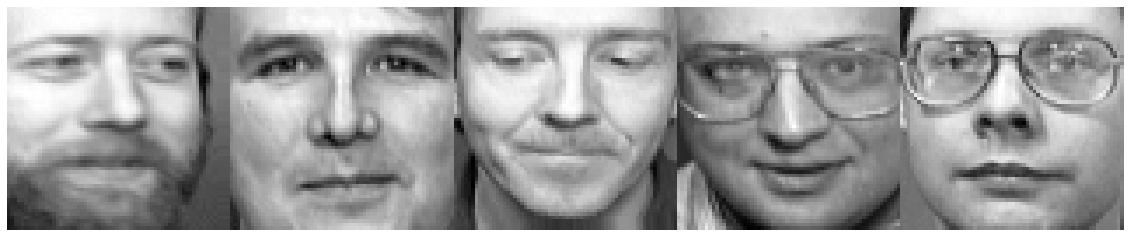

28


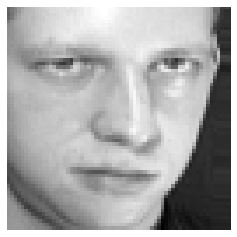

29


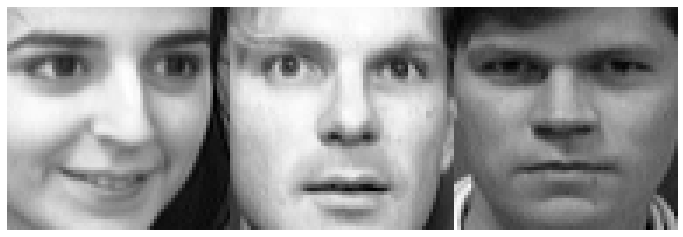

30


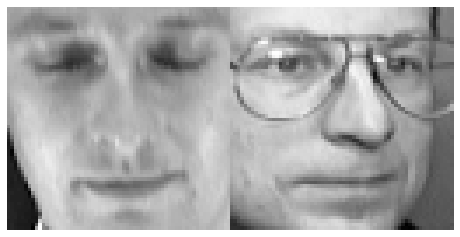

31


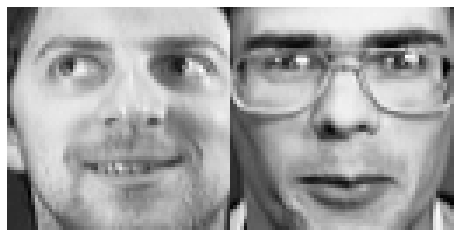

32


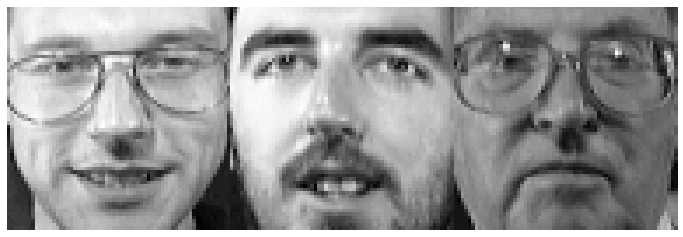

33


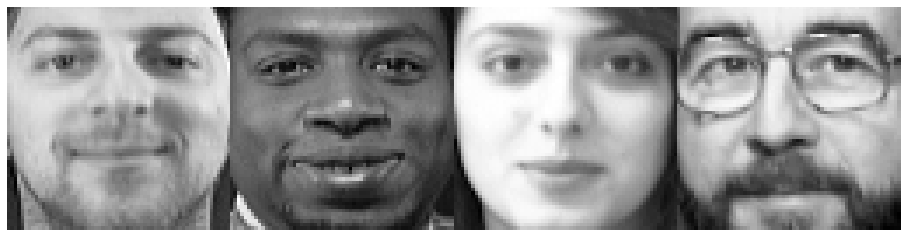

34


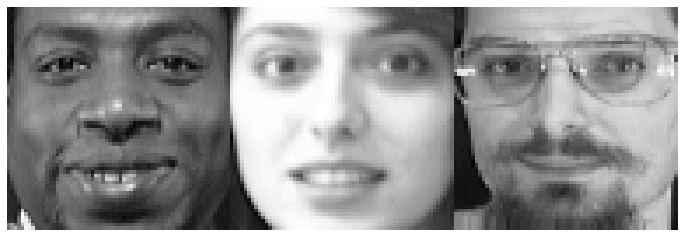

35


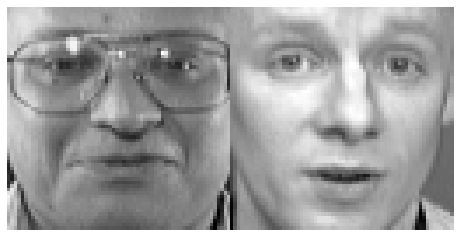

36


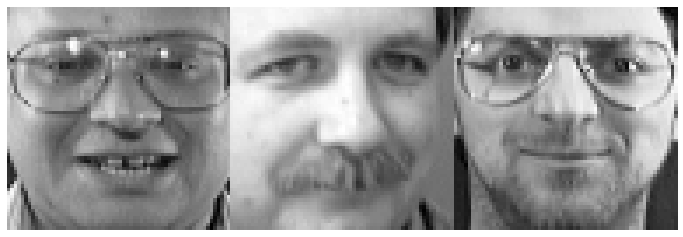

37


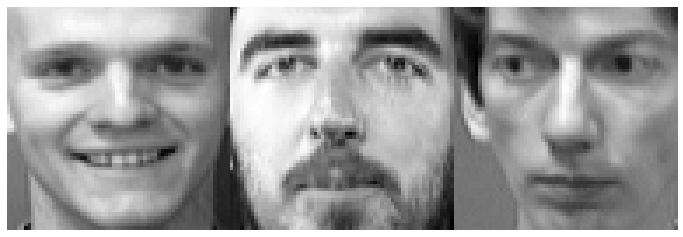

38


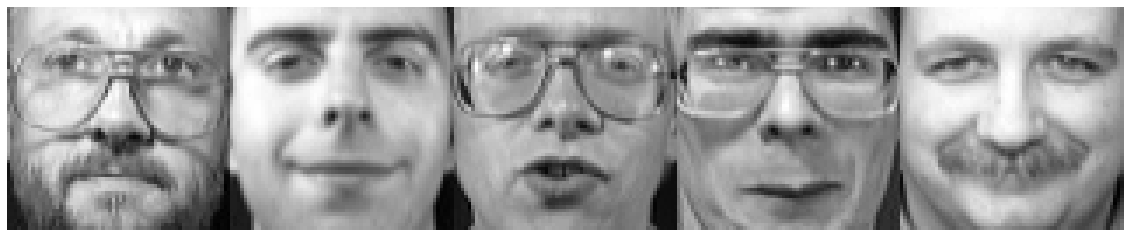

39


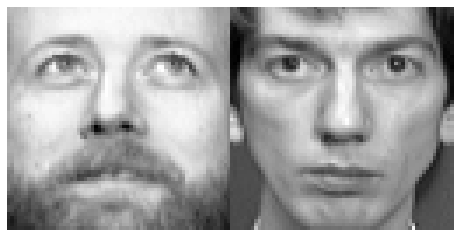

40


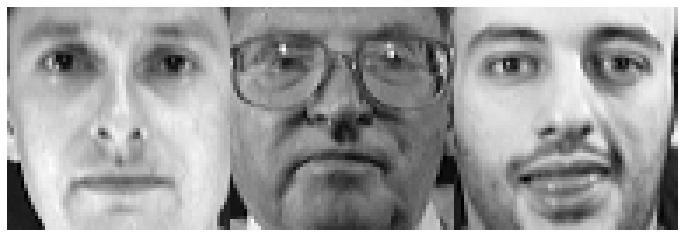

41


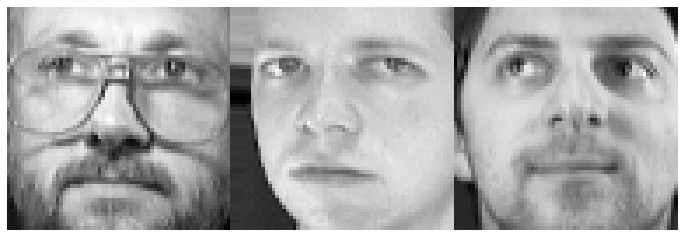

42


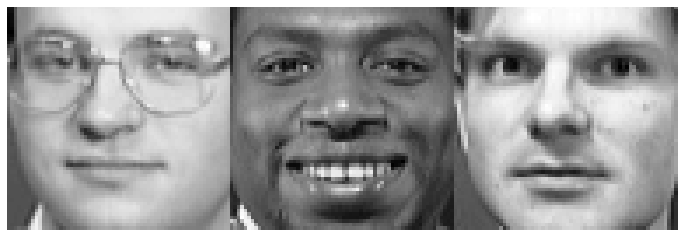

43


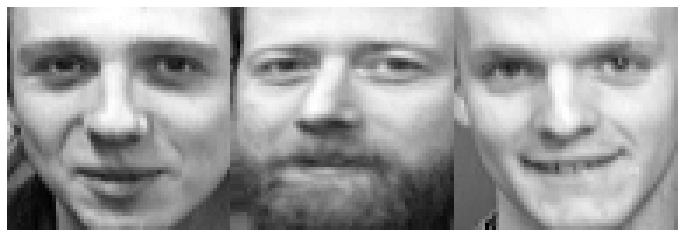

44


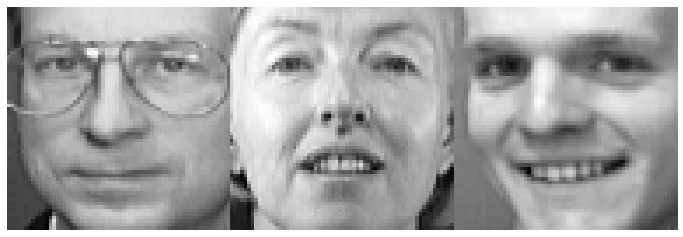

45


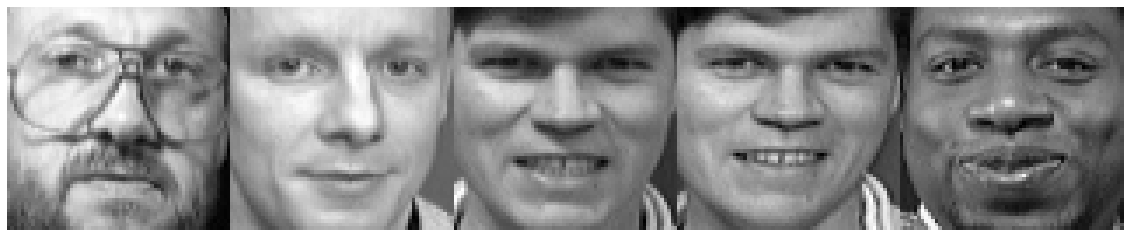

46


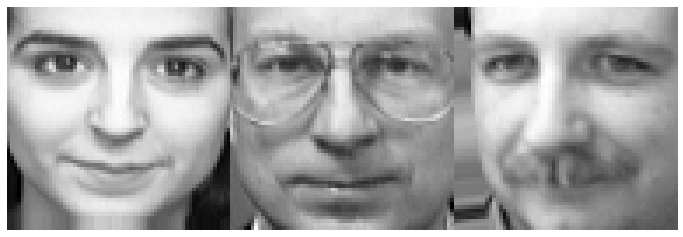

47


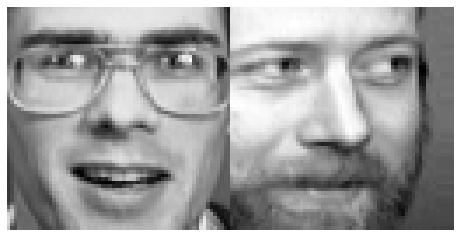

48


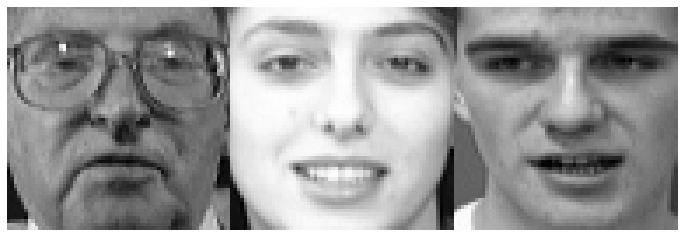

49


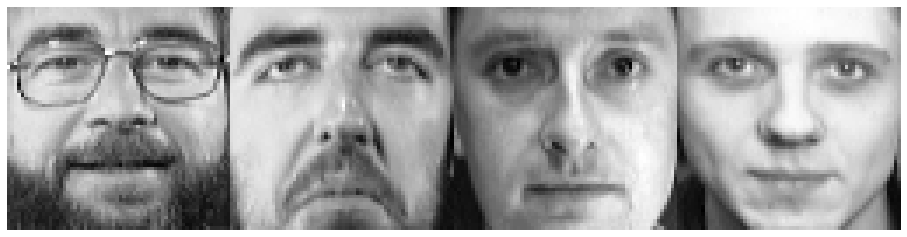

50


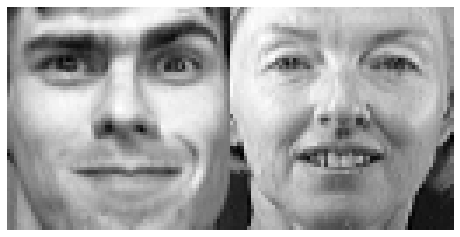

51


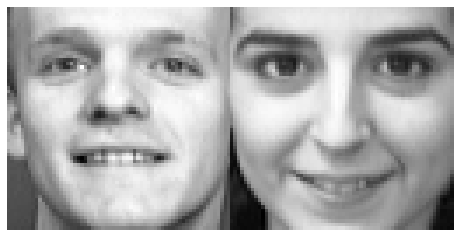

52


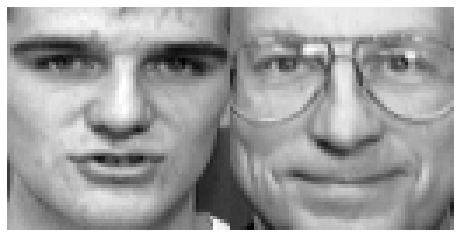

53


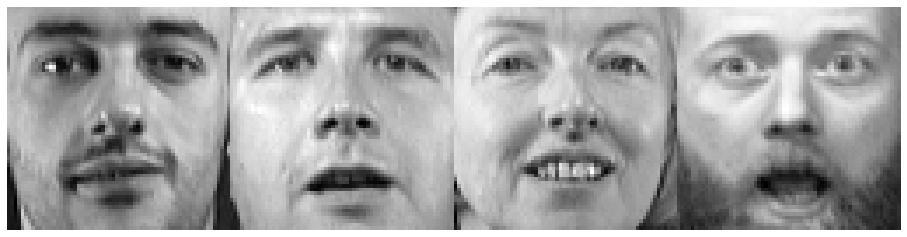

54


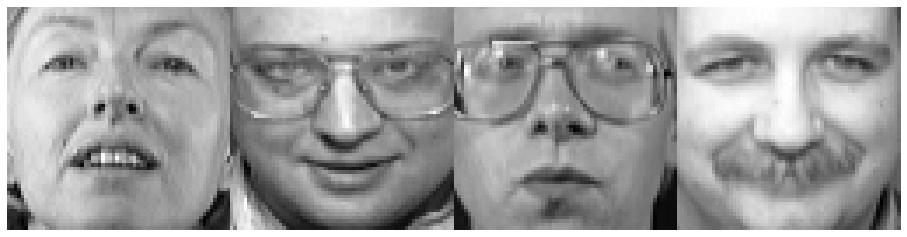

55


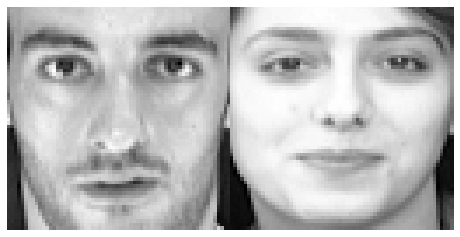

56


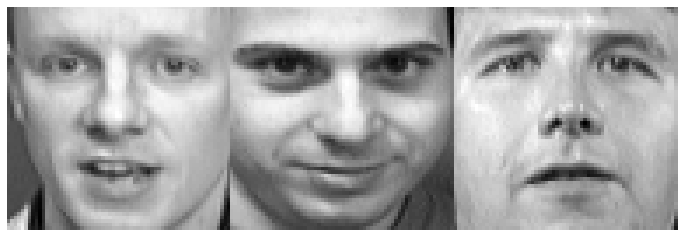

57


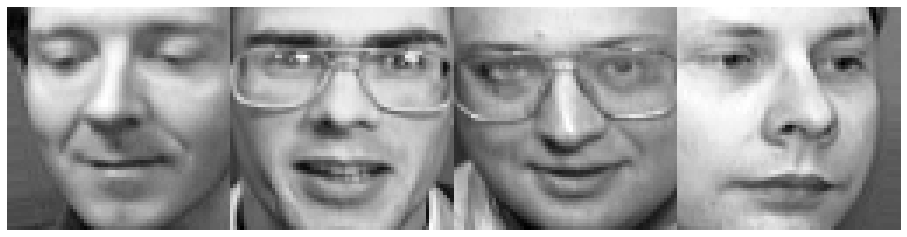

58


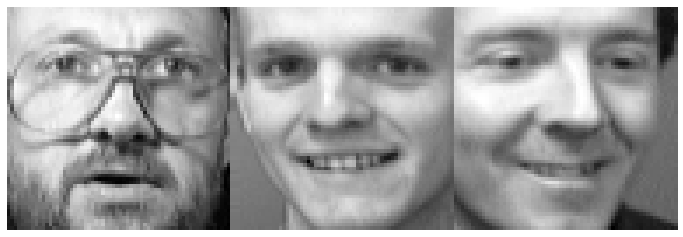

59


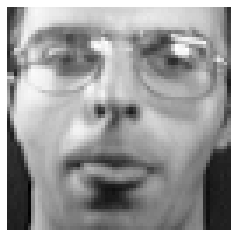

60


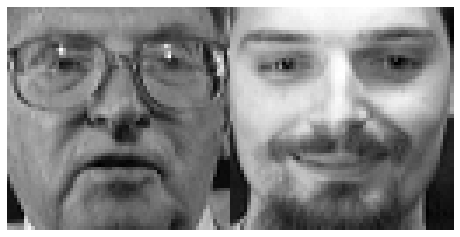

61


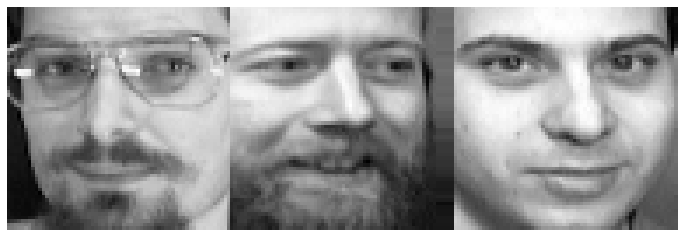

62


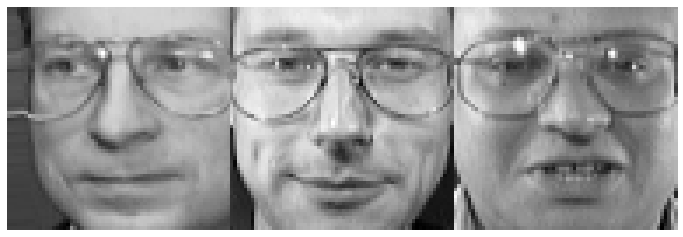

63


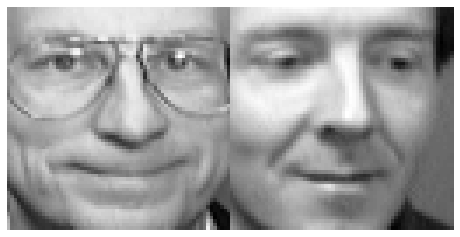

64


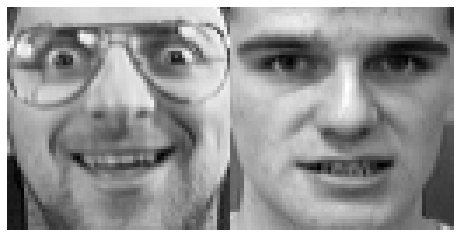

65


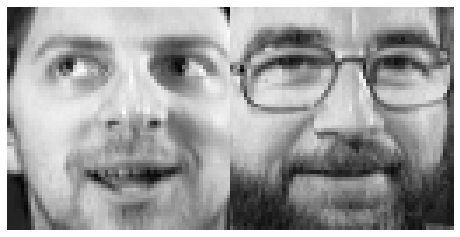

66


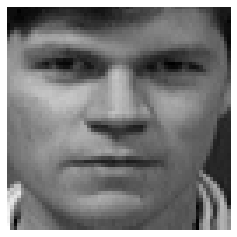

67


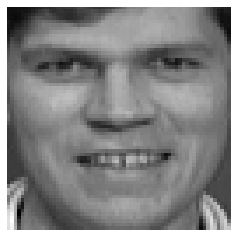

68


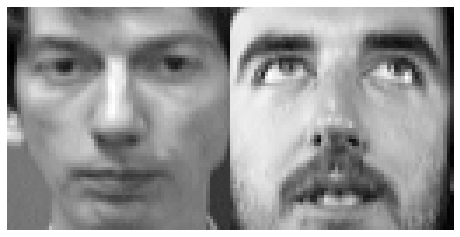

69


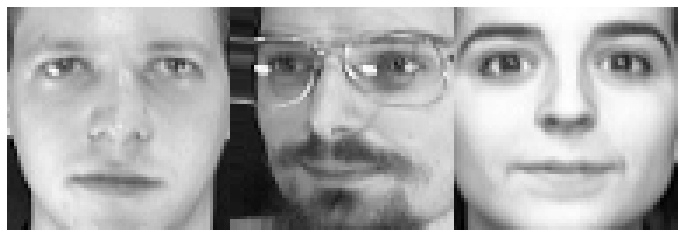

70


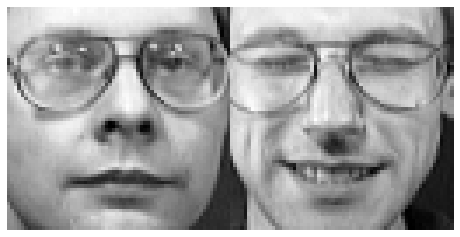

71


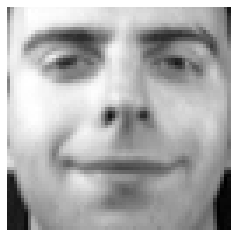

72


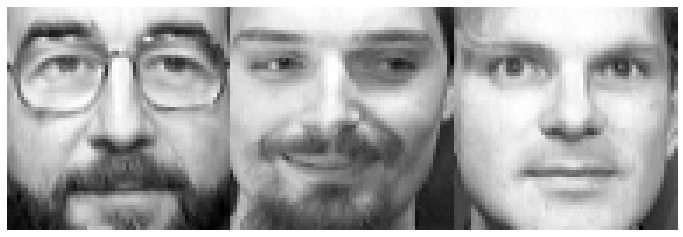

73


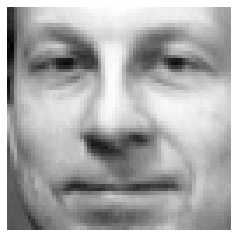

74


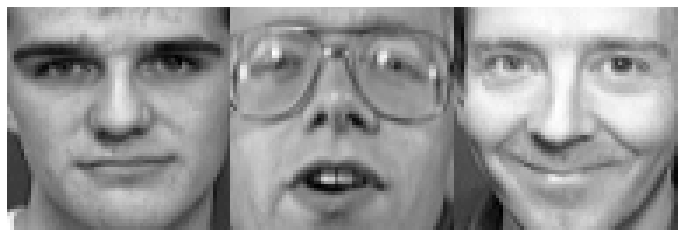

75


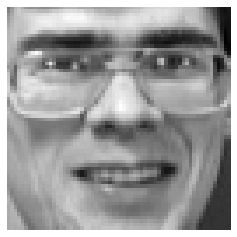

76


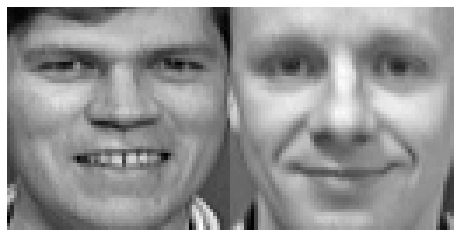

77


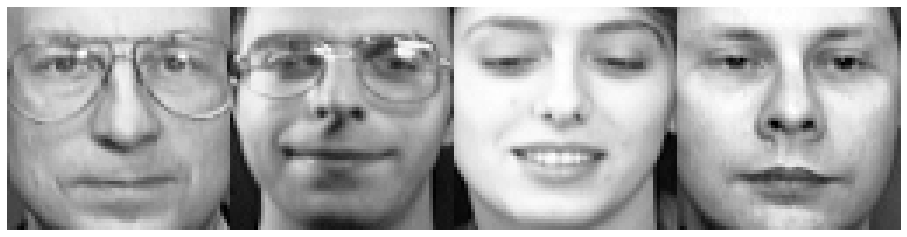

78


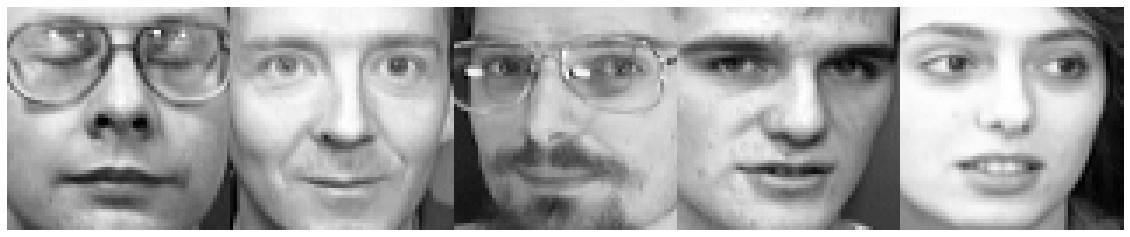

79


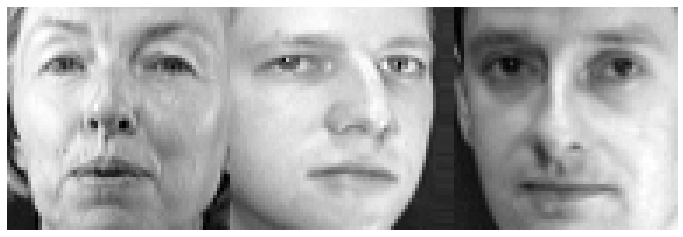

80


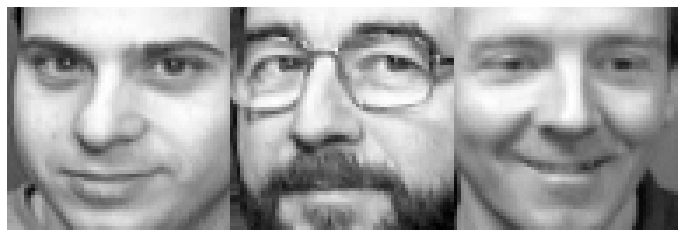

81


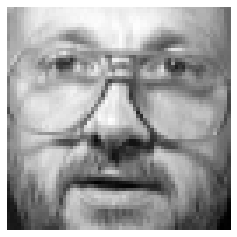

82


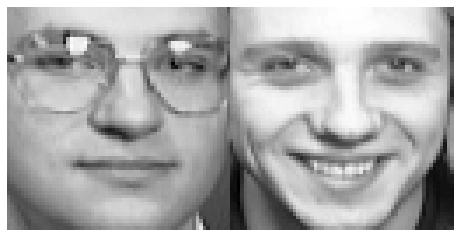

83


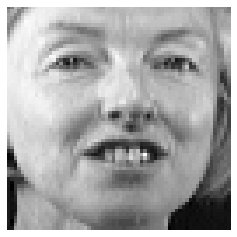

84


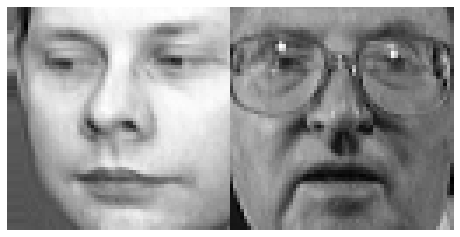

85


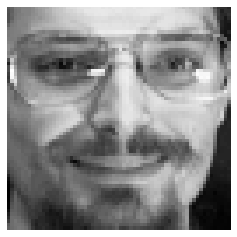

86


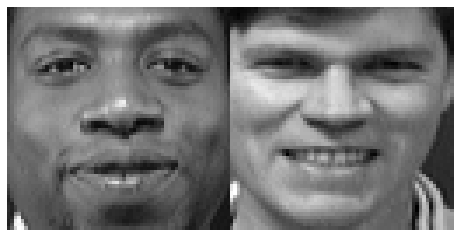

87


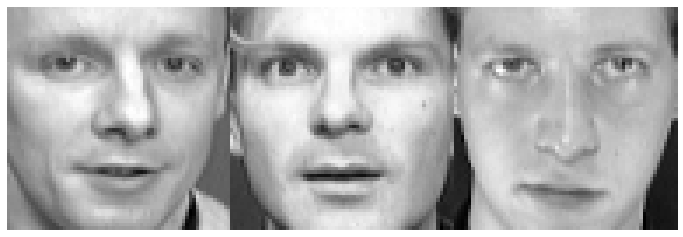

88


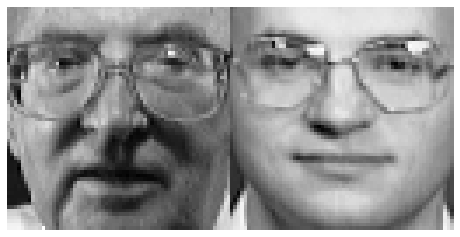

89


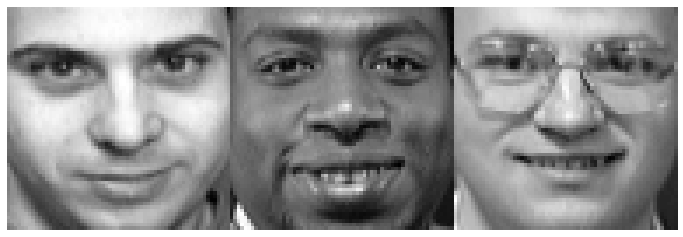

90


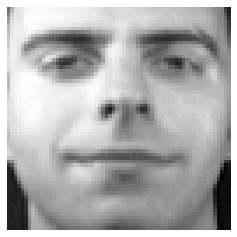

91


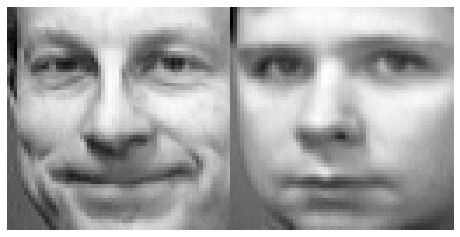

92


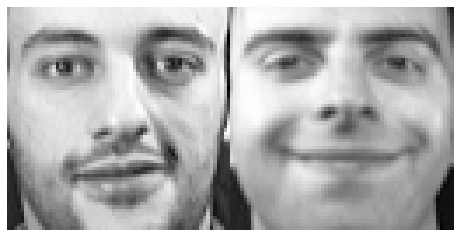

93


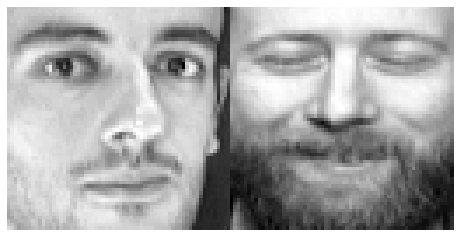

94


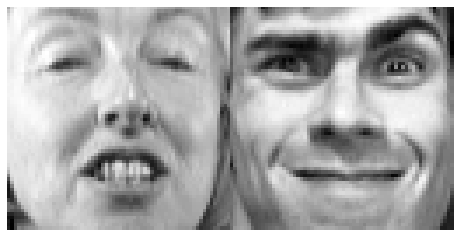

95


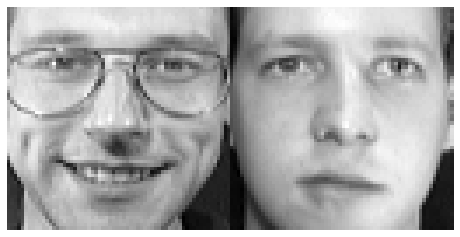

96


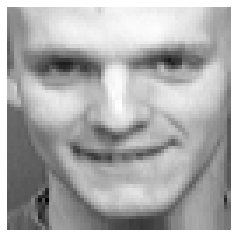

97


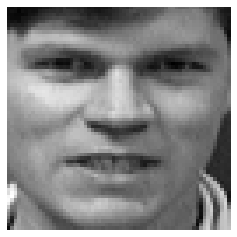

98


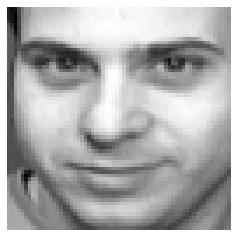

99


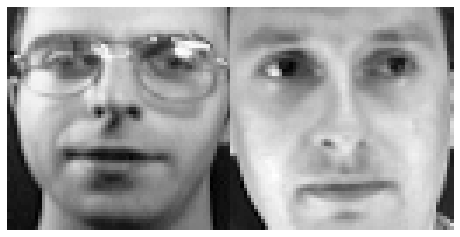

100


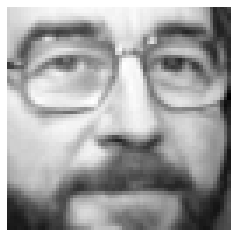

101


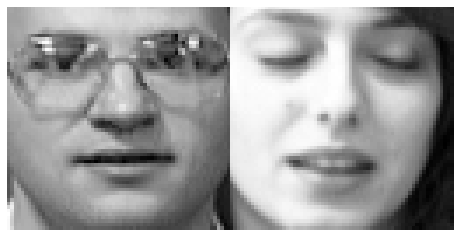

102


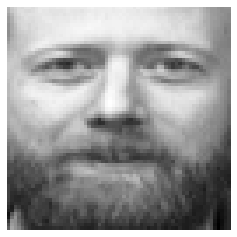

103


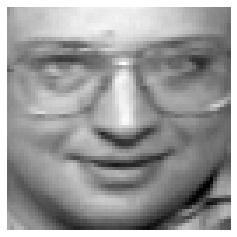

104


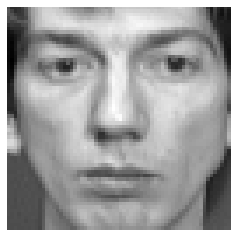

105


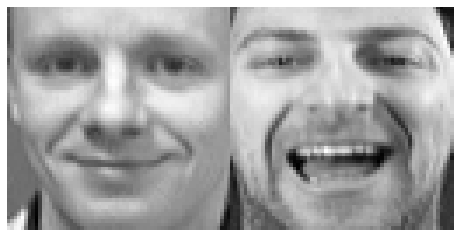

106


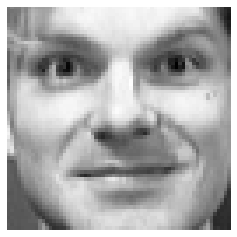

107


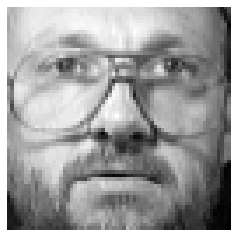

108


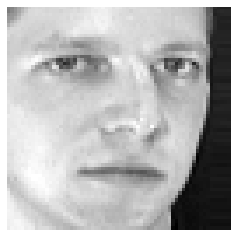

109


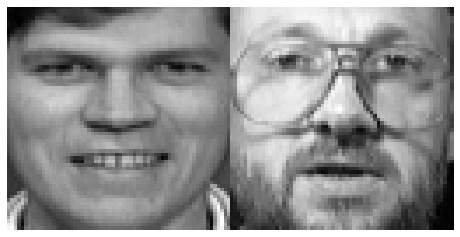

110


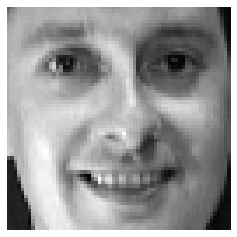

111


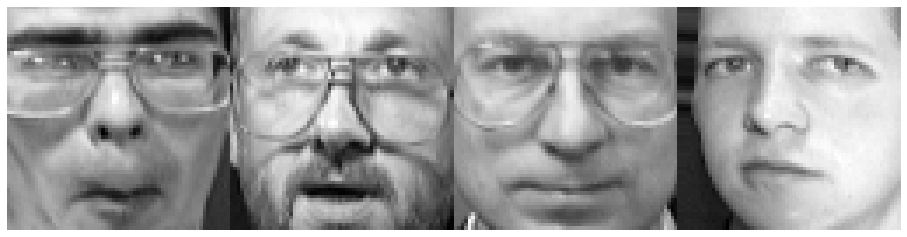

112


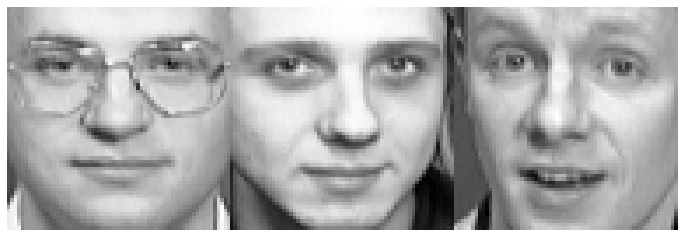

113


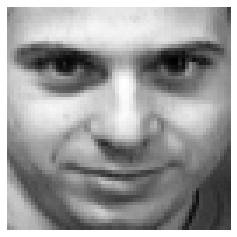

114


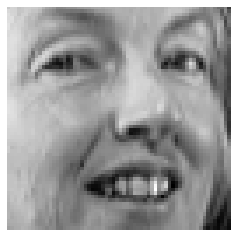

In [156]:
for i in range(0, n_groups):
    plt.figure(figsize=(40, 40))
    print(i)
    subplot_idx = 1
    for j, g in enumerate(km.labels_):
        if g == i:
            plt.subplot(1, 10, subplot_idx)
            plt.imshow(images_train[j], cmap="gray")
            plt.axis("off")
            subplot_idx += 1
            if subplot_idx > 10:
                break
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

11. _Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?_

In [87]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

clf = LinearSVC(random_state=0)#, tol=1e-5)

# {'C': 0.06, 'max_iter': 1050}
linsvc_param_grid = [
#    {'C' : [.06, .07, .08], 'max_iter' : [1050,1100,1200]}#,'loss' : ['hinge', 'squared_hinge']},
#    {'C' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
    {'C' : [1e-3], 'loss' : ['hinge', 'squared_hinge']}
  ]

grid_search = GridSearchCV(clf, linsvc_param_grid, cv=3,
                           #return_train_score=True, 
                           verbose=2)

main_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('grid', grid_search)
])
         
pipe_out = main_pipeline.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END ................................C=0.001, loss=hinge; total time=   2.1s
[CV] END ................................C=0.001, loss=hinge; total time=   2.1s
[CV] END ................................C=0.001, loss=hinge; total time=   2.6s
[CV] END ........................C=0.001, loss=squared_hinge; total time=   4.5s
[CV] END ........................C=0.001, loss=squared_hinge; total time=   4.5s
[CV] END ........................C=0.001, loss=squared_hinge; total time=   4.6s
{'C': 0.001, 'loss': 'squared_hinge'}


In [89]:
from sklearn.metrics import f1_score
f1_score(y_val, pipe_out.predict(X_val), average="macro")

0.9833333333333332

In [92]:
kmeans_param_grid = [
    {'n_clusters' : range(2, 41)}
  ]

kmeans_grid_search = GridSearchCV(KMeans(random_state=0), kmeans_param_grid, cv=3,
                           #return_train_score=True, 
                           verbose=2)

km0_main_pipeline = Pipeline([

    ('kmeans_grid_search', kmeans_grid_search),
    ('std_scaler', StandardScaler()),
    ('clf', LinearSVC(C=1e-3,random_state=0))
])
         
km0_pipe_out = km0_main_pipeline.fit(X_train, y_train)
print(kmeans_grid_search.best_params_)
f1_score(y_val, km0_pipe_out.predict(X_val), average="macro")

Fitting 3 folds for each of 39 candidates, totalling 117 fits
[CV] END .......................................n_clusters=2; total time=   0.2s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=3; total time=   0.2s
[CV] END .......................................n_clusters=3; total time=   0.2s
[CV] END .......................................n_clusters=3; total time=   0.2s
[CV] END .......................................n_clusters=4; total time=   0.3s
[CV] END .......................................n_clusters=4; total time=   0.3s
[CV] END .......................................n_clusters=4; total time=   0.3s
[CV] END .......................................n_clusters=5; total time=   0.3s
[CV] END .......................................n_clusters=5; total time=   0.3s
[CV] END ......................................

[CV] END ......................................n_clusters=35; total time=   1.5s
[CV] END ......................................n_clusters=36; total time=   1.6s
[CV] END ......................................n_clusters=36; total time=   1.6s
[CV] END ......................................n_clusters=36; total time=   1.6s
[CV] END ......................................n_clusters=37; total time=   1.6s
[CV] END ......................................n_clusters=37; total time=   1.7s
[CV] END ......................................n_clusters=37; total time=   1.7s
[CV] END ......................................n_clusters=38; total time=   1.7s
[CV] END ......................................n_clusters=38; total time=   1.7s
[CV] END ......................................n_clusters=38; total time=   1.7s
[CV] END ......................................n_clusters=39; total time=   1.7s
[CV] END ......................................n_clusters=39; total time=   1.8s
[CV] END ...................

0.5908333333333333

In [94]:
from sklearn.pipeline import FeatureUnion

kmeans1_grid_search = GridSearchCV(KMeans(random_state=0), kmeans_param_grid, cv=3,
                           #return_train_score=True, 
                           verbose=2)

km1_main_pipeline = Pipeline([
    ('feats', FeatureUnion([
        ('kmeans_grid_search', kmeans1_grid_search),
        ('std_scaler', StandardScaler())])),
    ('clf', LinearSVC(C=1e-3,random_state=0))
])
         
km1_pipe_out = km1_main_pipeline.fit(X_train, y_train)
print(kmeans1_grid_search.best_params_)
f1_score(y_val, km1_pipe_out.predict(X_val), average="macro")

Fitting 3 folds for each of 39 candidates, totalling 117 fits
[CV] END .......................................n_clusters=2; total time=   0.2s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=3; total time=   0.2s
[CV] END .......................................n_clusters=3; total time=   0.2s
[CV] END .......................................n_clusters=3; total time=   0.2s
[CV] END .......................................n_clusters=4; total time=   0.3s
[CV] END .......................................n_clusters=4; total time=   0.3s
[CV] END .......................................n_clusters=4; total time=   0.3s
[CV] END .......................................n_clusters=5; total time=   0.3s
[CV] END .......................................n_clusters=5; total time=   0.3s
[CV] END ......................................

[CV] END ......................................n_clusters=35; total time=   1.5s
[CV] END ......................................n_clusters=36; total time=   1.6s
[CV] END ......................................n_clusters=36; total time=   1.7s
[CV] END ......................................n_clusters=36; total time=   1.7s
[CV] END ......................................n_clusters=37; total time=   1.8s
[CV] END ......................................n_clusters=37; total time=   1.8s
[CV] END ......................................n_clusters=37; total time=   1.7s
[CV] END ......................................n_clusters=38; total time=   1.7s
[CV] END ......................................n_clusters=38; total time=   1.7s
[CV] END ......................................n_clusters=38; total time=   1.8s
[CV] END ......................................n_clusters=39; total time=   1.8s
[CV] END ......................................n_clusters=39; total time=   1.8s
[CV] END ...................

0.9199999999999999

12. _Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies)._

In [95]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_train1 = pca.fit_transform(X_train)
print(X_train1.shape)

(289, 205)


In [130]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=30, n_init=10, random_state=42)
bgm.fit(X_train1)
bgm.weights_.round(2)

array([0.02, 0.05, 0.02, 0.02, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.06,
       0.06, 0.03, 0.02, 0.05, 0.03, 0.03, 0.05, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.05, 0.02, 0.02, 0.02, 0.02, 0.04, 0.02])

In [131]:
x_gen_pca, y_gen_pca = bgm.sample(10)
x_gen = pca.inverse_transform(x_gen_pca)
x_gen

array([[0.43252387, 0.47154269, 0.50387501, ..., 0.30507107, 0.25805936,
        0.24973537],
       [0.38413013, 0.47389037, 0.53250903, ..., 0.31516385, 0.26722646,
        0.25626082],
       [0.27952526, 0.31801116, 0.36546913, ..., 0.38048258, 0.39536563,
        0.36523427],
       ...,
       [0.29873489, 0.36128435, 0.43015641, ..., 0.21682151, 0.2276142 ,
        0.23735812],
       [0.22771154, 0.21706453, 0.26744467, ..., 0.42736608, 0.41330337,
        0.42992391],
       [0.25015816, 0.22799573, 0.19060262, ..., 0.24959944, 0.25646339,
        0.25877248]])

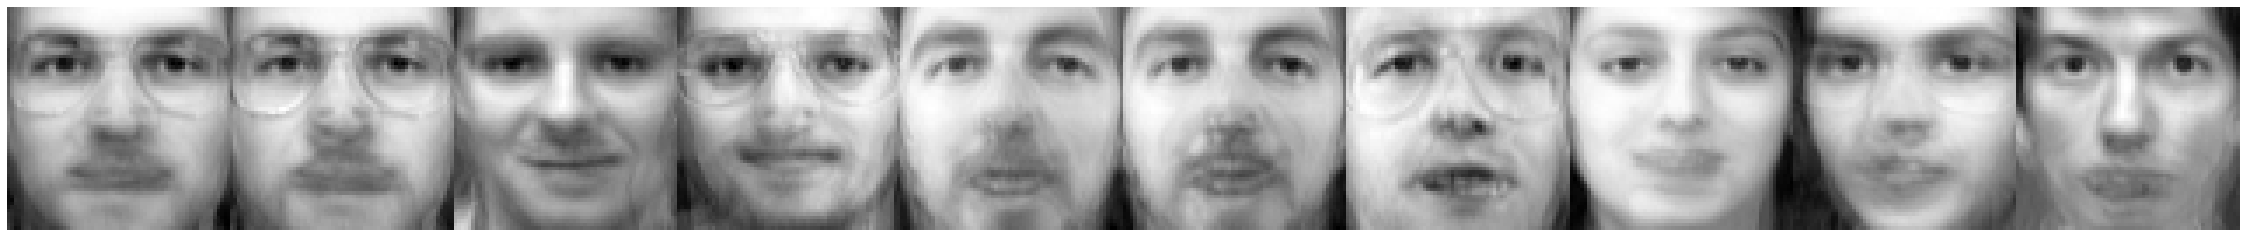

In [132]:
plt.figure(figsize=(40, 40))
for j, g in enumerate(x_gen):
    plt.subplot(1, 10, j+1)
    plt.imshow(g.reshape(64,64), cmap="gray")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [134]:
avg = np.average(bgm.score_samples(X_train1))
avg

392.8090132424576

In [157]:
X_train_flip = np.flip(X_train, 1)
X_train_flip_pca = pca.transform(X_train_flip)
avg = np.average(bgm.score_samples(X_train_flip_pca))
avg

-46529.34278321856

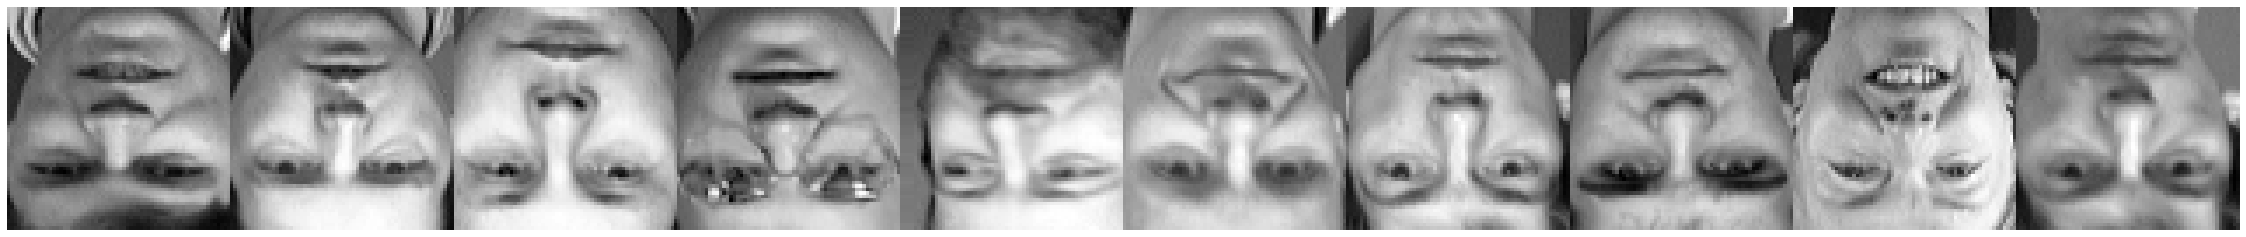

In [161]:
plt.figure(figsize=(40, 40))
for j, g in enumerate(X_train_flip):
    if j >= 10:
        break
    plt.subplot(1, 10, j+1)
    plt.imshow(g.reshape(64,64), cmap="gray")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

13. _Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face._

In [162]:
from sklearn.metrics import mean_squared_error

X_train_pca = X_train1
X_train_recon = pca.inverse_transform(X_train_pca)
mean_squared_error(X_train, X_train_recon)

0.00018888275

In [163]:
X_train_flip_recon = pca.inverse_transform(X_train_flip_pca)
mean_squared_error(X_train, X_train_flip_recon)

0.048237823

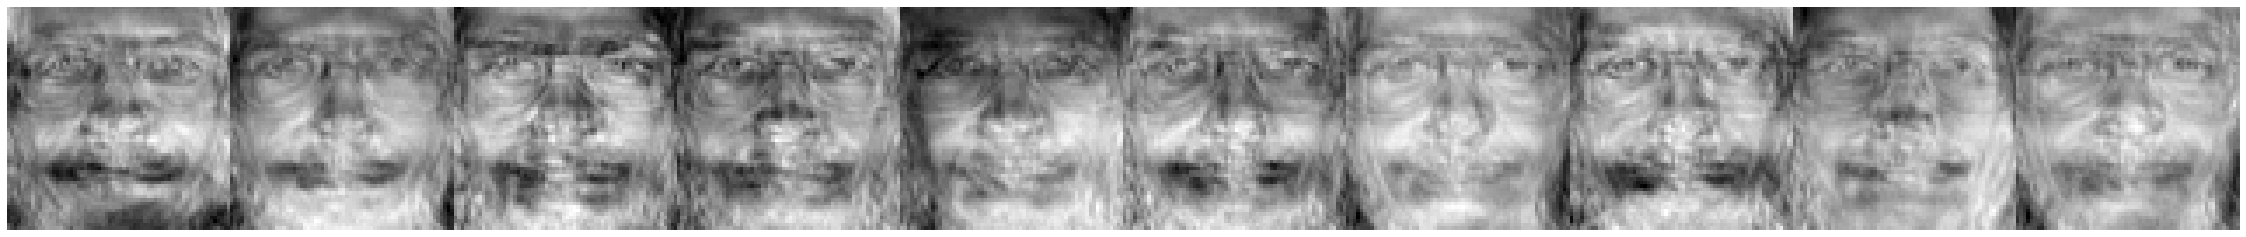

In [164]:
plt.figure(figsize=(40, 40))
for j, g in enumerate(X_train_flip_recon):
    if j >= 10:
        break
    plt.subplot(1, 10, j+1)
    plt.imshow(g.reshape(64,64), cmap="gray")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()